<a href="https://colab.research.google.com/github/noemicho/pokeAPI/blob/main/DesafioParte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio Técnico - pokeAPI**

#### Escolhendo Pokemon aleatório para visualizar os nomes das colunas

In [2]:
# Importando bibliotecas
import requests
import pandas as pd

# URL do pokemon Bulbasaur
url_bulbasaur = "https://pokeapi.co/api/v2/pokemon/bulbasaur"

response = requests.get(url_bulbasaur)

# Se a requisição da API for ok, transformar dados para JSON
if response.status_code == 200:
    print("Requisição OK")
    data_bulbasaur = response.json()
else:
    print(f"Erro: {response.status_code}")

# Listando as colunas dos dados dos Pokemons
print(data_bulbasaur.keys())


Requisição OK
dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


#### Criando Dataframe com mais pokemons com as colunas escolhidas

In [11]:
# Função para pegar dados de um Pokemon pelo id
def get_pokemon_data(pokemon_id):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_id}"
    response = requests.get(url)
    return response.json() if response.status_code == 200 else None

pokemon_list = []

# Definindo intervalo para quantidade de pokemons
for pokemon_id in range(1, 20):
    data = get_pokemon_data(pokemon_id)

    # Se a requisição foi ok
    if data:
        pokemon_data = {
            "name": data["name"],
            "id": data["id"],
            "weight": data["weight"],
            "height": data["height"],
            "XP": data["base_experience"],
            "abilities": [h["ability"]["name"] for h in data["abilities"]],
            "moves": [m["move"]["name"] for m in data["moves"]],
            "types": [t["type"]["name"] for t in data["types"]]
        }
        pokemon_list.append(pokemon_data)
    else:
        print("Erro em coletar dados...")

# Tranformando em DataFrame
df = pd.DataFrame(pokemon_list)
print(df)


          name  id  weight  height   XP                            abilities  \
0    bulbasaur   1      69       7   64              [overgrow, chlorophyll]   
1      ivysaur   2     130      10  142              [overgrow, chlorophyll]   
2     venusaur   3    1000      20  263              [overgrow, chlorophyll]   
3   charmander   4      85       6   62                 [blaze, solar-power]   
4   charmeleon   5     190      11  142                 [blaze, solar-power]   
5    charizard   6     905      17  267                 [blaze, solar-power]   
6     squirtle   7      90       5   63                 [torrent, rain-dish]   
7    wartortle   8     225      10  142                 [torrent, rain-dish]   
8    blastoise   9     855      16  265                 [torrent, rain-dish]   
9     caterpie  10      29       3   39              [shield-dust, run-away]   
10     metapod  11      99       7   72                          [shed-skin]   
11  butterfree  12     320      11  198 

### **Visualizando os dados dos Pokemons**

In [30]:
# Bibliotecas para visualizar os dados com gráficos
import matplotlib.pyplot as plt

In [17]:
# Quebrando a coluna 'types' para o respectivo pokemon e contando quantos tem de cada tipo
df_tipos = df.explode('types')
tipos_qnt = df_tipos['types'].value_counts()

print("Quantidade de cada tipo:")
print(tipos_qnt)

Quantidade de cada tipo:
types
poison    6
bug       6
flying    5
normal    4
grass     3
fire      3
water     3
Name: count, dtype: int64


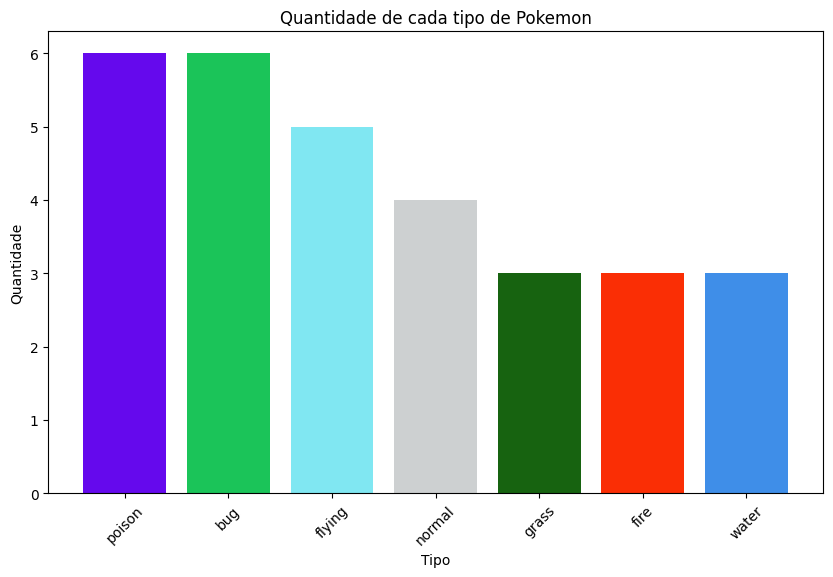

In [33]:
# Gráfico de Barras para quantidade de cada tipo de Pokemon

colors = [
    "#6509ed",  # poison
    "#1bc459",  # bug
    "#80e7f2",  # flying
    "#cdd0d1",  # normal
    "#176310",  # grass
    "#fa2e05",  # fire
    "#3f8ee8",  # water
]

plt.figure(figsize=(10, 6))
plt.bar(tipos_qnt.index, tipos_qnt.values, color=colors)
plt.title('Quantidade de cada tipo de Pokemon')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()
